In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# erste Zeile der Daten wird sonst als Kopfzeile interpretiert
data_frame = pd.read_csv('heart.dat', delimiter=' ', header=None)
data_frame.columns = ['age', 'sex','cp' , 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',  'cldpeak', 'slope', 'ca', 'thal', 'target']

In [23]:
data_frame.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,cldpeak,slope,ca,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2


In [24]:
# eher technische Infos
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    float64
 1   sex       270 non-null    float64
 2   cp        270 non-null    float64
 3   trestbps  270 non-null    float64
 4   chol      270 non-null    float64
 5   fbs       270 non-null    float64
 6   restecg   270 non-null    float64
 7   thalach   270 non-null    float64
 8   exang     270 non-null    float64
 9   cldpeak   270 non-null    float64
 10  slope     270 non-null    float64
 11  ca        270 non-null    float64
 12  thal      270 non-null    float64
 13  target    270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB


In [25]:
# deskriptive Informationen (Quantile, Standardabweichung, etc.)
data_frame.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,cldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [26]:
quantil25 = data_frame.chol.quantile(0.25)
print(quantil25)

213.0


Quantile:
25%: 213.0
75%: 280.0


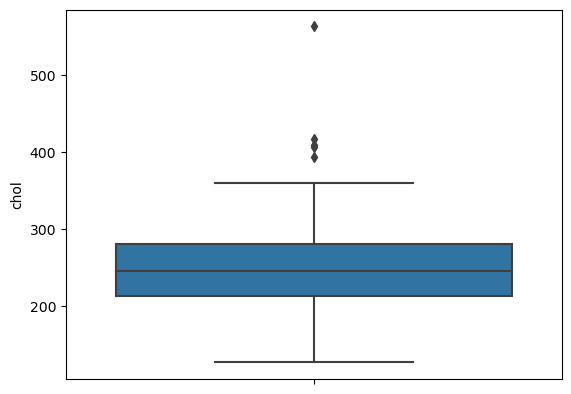

In [27]:
# mit Jupyter möglich: %pip3 install seaborn
import seaborn as sns

sns.boxplot(y = data_frame.chol)
quantil75 = data_frame.chol.quantile(0.75)

print('Quantile:')
print(f"25%: {quantil25}")
print(f"75%: {quantil75}")

Bereinigte Werte


<AxesSubplot: ylabel='chol'>

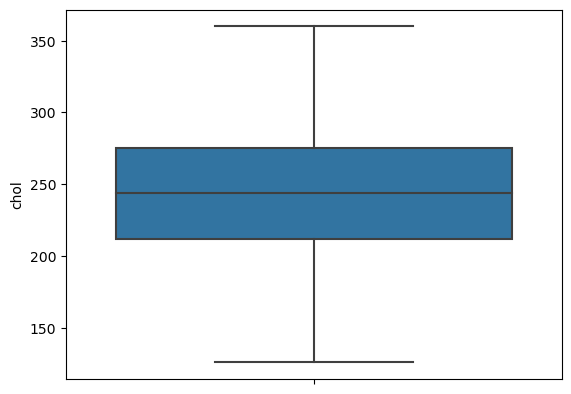

In [28]:
print("Bereinigte Werte")
iqr: float = quantil75 - quantil25
threshold_low: float = quantil25 - 1.5* iqr
threshold_high: float = quantil75 + 1.5* iqr

cleared_data_frame = data_frame.loc[(data_frame.chol > threshold_low) & (data_frame.chol < threshold_high)]
sns.boxplot(y = cleared_data_frame.chol)

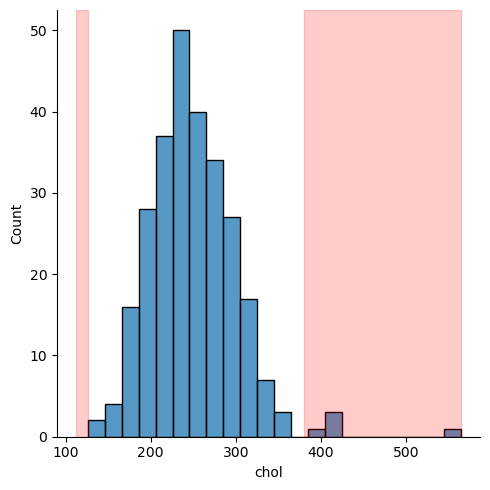

In [32]:
sns.displot(data_frame.chol)
plt.axvspan(xmin=threshold_low, xmax=data_frame.chol.min(), alpha=0.2, color='red')
plt.axvspan(xmin=threshold_high, xmax=data_frame.chol.max(), alpha=0.2, color='red')